<a href="https://colab.research.google.com/github/Ashfagithub/CODSOFT/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

 79% 33.0M/41.7M [00:00<00:00, 71.4MB/s]
100% 41.7M/41.7M [00:00<00:00, 88.9MB/s]


In [ ]:
!unzip genre-classification-dataset-imdb.zip

Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/Genre Classification Dataset/train_data.txt",
                    sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
test = pd.read_csv("/content/Genre Classification Dataset/test_data.txt",sep=':::',names=['Title', 'Description']).reset_index(drop=True)

train.head(10)

<ipython-input-8-d657f1657b17>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv("/content/Genre Classification Dataset/train_data.txt",
<ipython-input-8-d657f1657b17>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("/content/Genre Classification Dataset/test_data.txt",sep=':::',names=['Title', 'Description']).reset_index(drop=True)


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [ ]:
test.head(10)

,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...
5,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,L'amica (1969),The beautiful but neglected wife of a brillia...
7,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,Press (2011),Press is a story of young people overwhelmed ...


In [ ]:
train.shape, test.shape

((54214, 3), (54200, 2))

In [ ]:
unique_genres = train['Genre'].nunique()

print(f'Number of unique genres: {unique_genres}')

Number of unique genres: 27


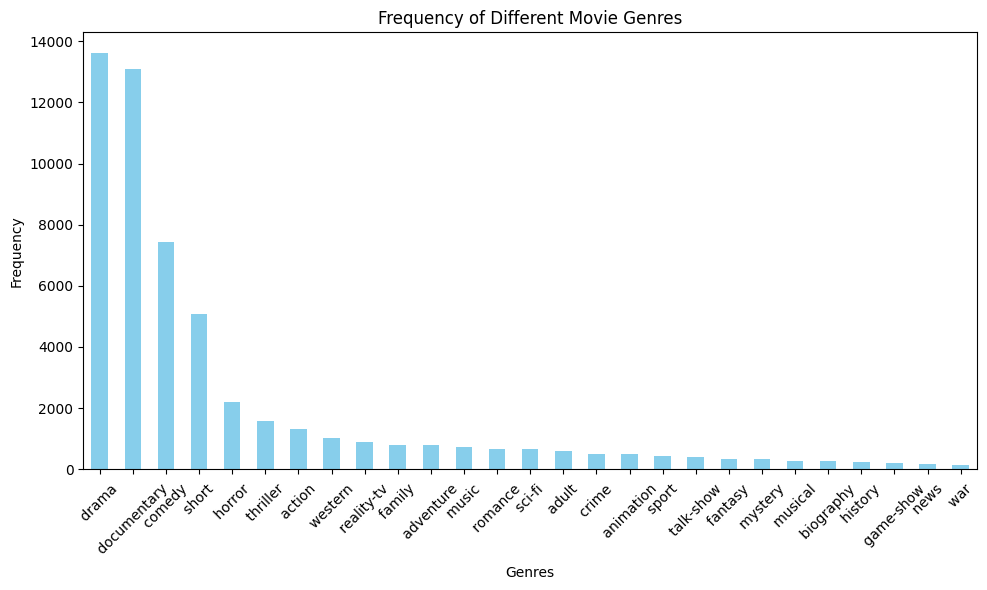

In [ ]:
import matplotlib.pyplot as plt

genre_counts = train['Genre'].value_counts()


plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Different Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
train.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train.duplicated().sum()

0

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [ ]:
test.duplicated().sum()

0